In [1]:
import pandas as pd
import os

raw_path = "../data/raw"
os.listdir(raw_path)


['api_data_aadhar_biometric',
 'api_data_aadhar_biometric.zip',
 'api_data_aadhar_demographic',
 'api_data_aadhar_demographic.zip']

In [2]:
os.listdir("../data/raw/api_data_aadhar_demographic")


['api_data_aadhar_demographic_0_500000.csv',
 'api_data_aadhar_demographic_1000000_1500000.csv',
 'api_data_aadhar_demographic_1500000_2000000.csv',
 'api_data_aadhar_demographic_2000000_2071700.csv',
 'api_data_aadhar_demographic_500000_1000000.csv']

In [3]:
os.listdir("../data/raw/api_data_aadhar_biometric")


['api_data_aadhar_biometric_0_500000.csv',
 'api_data_aadhar_biometric_1000000_1500000.csv',
 'api_data_aadhar_biometric_1500000_1861108.csv',
 'api_data_aadhar_biometric_500000_1000000.csv']

In [4]:
import pandas as pd

demo_path = "../data/raw/api_data_aadhar_demographic/api_data_aadhar_demographic_0_500000.csv"
demo_df = pd.read_csv(demo_path)

demo_df.head()


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [5]:
bio_path = "../data/raw/api_data_aadhar_biometric/api_data_aadhar_biometric_0_500000.csv"
bio_df = pd.read_csv(bio_path)

bio_df.head()


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [6]:
# list(demo_df.columns)



In [7]:
# list(bio_df.columns)


In [8]:
bio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          500000 non-null  object
 1   state         500000 non-null  object
 2   district      500000 non-null  object
 3   pincode       500000 non-null  int64 
 4   bio_age_5_17  500000 non-null  int64 
 5   bio_age_17_   500000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 22.9+ MB


In [9]:
bio_df['district'].unique().size

945

In [10]:
import pandas as pd

demo_files = [
    "../data/raw/api_data_aadhar_demographic/api_data_aadhar_demographic_0_500000.csv",
    "../data/raw/api_data_aadhar_demographic/api_data_aadhar_demographic_500000_1000000.csv",
    "../data/raw/api_data_aadhar_demographic/api_data_aadhar_demographic_1000000_1500000.csv",
    "../data/raw/api_data_aadhar_demographic/api_data_aadhar_demographic_1500000_2000000.csv",
    "../data/raw/api_data_aadhar_demographic/api_data_aadhar_demographic_2000000_2071700.csv"
]

demo_df = pd.concat([pd.read_csv(f) for f in demo_files], ignore_index=True)

demo_df.shape


(2071700, 6)

In [11]:
bio_files = [
    "../data/raw/api_data_aadhar_biometric/api_data_aadhar_biometric_0_500000.csv",
    "../data/raw/api_data_aadhar_biometric/api_data_aadhar_biometric_500000_1000000.csv",
    "../data/raw/api_data_aadhar_biometric/api_data_aadhar_biometric_1000000_1500000.csv",
    "../data/raw/api_data_aadhar_biometric/api_data_aadhar_biometric_1500000_1861108.csv"
]

bio_df = pd.concat([pd.read_csv(f) for f in bio_files], ignore_index=True)

bio_df.shape


(1861108, 6)

In [12]:
full_df = pd.concat([demo_df, bio_df], ignore_index=True)
# full_df = pd.merge(demo_df, bio_df, on='common_column', how='inner')


full_df.shape
# full_df.head()
full_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932808 entries, 0 to 3932807
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   state          object 
 2   district       object 
 3   pincode        int64  
 4   demo_age_5_17  float64
 5   demo_age_17_   float64
 6   bio_age_5_17   float64
 7   bio_age_17_    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 240.0+ MB


In [13]:
full_df.sample(10)
# full_df.describe()
# full_df.info()
full_df.isnull().sum()

date                   0
state                  0
district               0
pincode                0
demo_age_5_17    1861108
demo_age_17_     1861108
bio_age_5_17     2071700
bio_age_17_      2071700
dtype: int64

In [14]:
full_df['date'] = pd.to_datetime(full_df['date'] , errors='coerce')

# full_df.info
full_df['date'].isna().sum()

np.int64(2132068)

In [15]:
# full_df[['demo_age_5_17','demo_age_17_','bio_age_5_17','bio_age_17_']].isnull().sum() 
null_cols = ['demo_age_5_17','demo_age_17_','bio_age_5_17','bio_age_17_']

full_df[null_cols] = full_df[null_cols].fillna(0)

full_df.info()
full_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932808 entries, 0 to 3932807
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date           datetime64[ns]
 1   state          object        
 2   district       object        
 3   pincode        int64         
 4   demo_age_5_17  float64       
 5   demo_age_17_   float64       
 6   bio_age_5_17   float64       
 7   bio_age_17_    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 240.0+ MB


date             2132068
state                  0
district               0
pincode                0
demo_age_5_17          0
demo_age_17_           0
bio_age_5_17           0
bio_age_17_            0
dtype: int64

In [16]:
time_df = full_df[full_df['date'].notna()].copy()
static_df = full_df[full_df['date'].isna()].copy()

time_df.shape
# static_df.shape

(1800740, 8)

In [17]:
static_df.shape

(2132068, 8)

In [18]:
full_df['date'].sample(10)

1747002          NaT
3606367   2025-10-12
1376919          NaT
3054345   2025-06-11
1662153   2025-01-09
106738           NaT
3748253          NaT
2030910          NaT
858412    2025-08-09
2290739   2025-06-09
Name: date, dtype: datetime64[ns]

In [19]:
# Using only time valid data

time_df['month'] = time_df['date'].dt.to_period('M')

time_df[['date','month']].head()

# time_df.head()


,date,month
0,2025-01-03,2025-01
1,2025-01-03,2025-01
2,2025-01-03,2025-01
3,2025-01-03,2025-01
4,2025-01-03,2025-01


In [20]:
monthly_df = (time_df.drop(columns=['date']).groupby(['month', 'state', 'district']).sum().reset_index())


monthly_df.head()
# monthly_df.shape


,month,state,district,pincode,demo_age_5_17,demo_age_17_,bio_age_5_17,bio_age_17_
0,2025-01,Andaman & Nicobar Islands,Andamans,25299936,0.0,33.0,96.0,923.0
1,2025-01,Andaman & Nicobar Islands,Nicobars,744301,0.0,0.0,1.0,0.0
2,2025-01,Andaman & Nicobar Islands,South Andaman,11906076,0.0,13.0,1.0,10.0
3,2025-01,Andaman and Nicobar Islands,Nicobar,26050573,33.0,386.0,534.0,513.0
4,2025-01,Andaman and Nicobar Islands,North And Middle Andaman,49861732,60.0,861.0,2102.0,2074.0


In [21]:
monthly_totals = ( monthly_df.groupby('month')[['demo_age_5_17','demo_age_17_','bio_age_5_17','bio_age_17_']].sum())

monthly_totals.sample(10)

,demo_age_5_17,demo_age_17_,bio_age_5_17,bio_age_17_
month,,,,
2025-02,116968.0,977291.0,666600.0,593410.0
2025-09,102063.0,864885.0,559539.0,548019.0
2025-10,116946.0,1170779.0,571703.0,543083.0
2025-12,137126.0,1374722.0,653525.0,612173.0
2025-01,1981758.0,17348747.0,20827015.0,22937341.0
2025-04,132013.0,1258533.0,512443.0,526938.0
2025-11,114951.0,1086485.0,643552.0,608791.0
2025-03,129118.0,1117717.0,563950.0,576240.0
2025-05,87902.0,749274.0,389715.0,428201.0


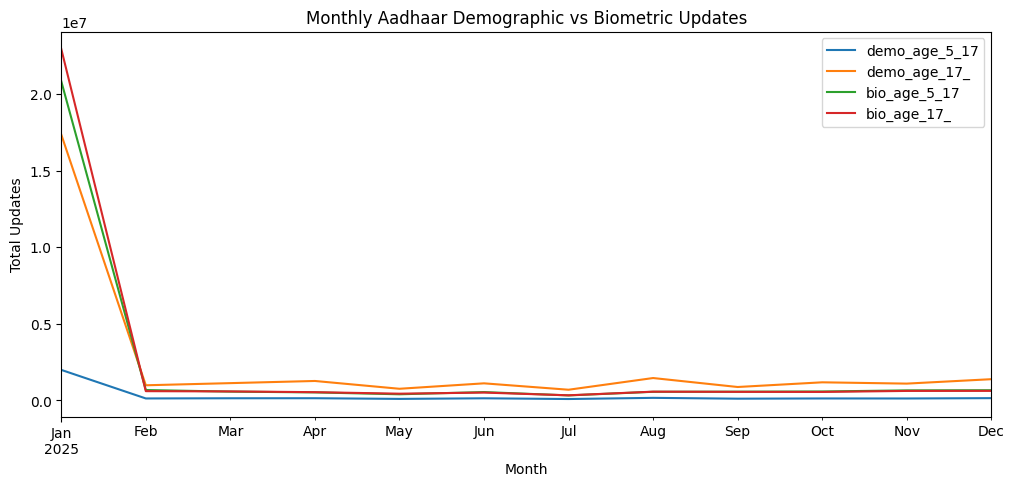

In [22]:
import matplotlib.pyplot as plt

monthly_totals.plot(figsize=(12,5))
plt.title("Monthly Aadhaar Demographic vs Biometric Updates")
plt.xlabel("Month")
plt.ylabel("Total Updates")
plt.show()


In [23]:
monthly_df.columns


Index(['month', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_', 'bio_age_5_17', 'bio_age_17_'],
      dtype='object')

In [24]:
# Total biometric updates
monthly_df['bio_total'] = (
    monthly_df['bio_age_5_17'] + monthly_df['bio_age_17_']
)

# Total demographic updates
monthly_df['demo_total'] = (
    monthly_df['demo_age_5_17'] + monthly_df['demo_age_17_']
)

# Behaviour ratio (avoid divide by zero)
monthly_df['bio_demo_ratio'] = (
    monthly_df['bio_total'] / (monthly_df['demo_total'] + 1)
)

monthly_df[['bio_total', 'demo_total', 'bio_demo_ratio']].head()


,bio_total,demo_total,bio_demo_ratio
0,1019.0,33.0,29.970588
1,1.0,0.0,1.000000
2,11.0,13.0,0.785714
3,1047.0,419.0,2.492857
4,4176.0,921.0,4.529284


In [25]:
from sklearn.ensemble import IsolationForest

model  = IsolationForest(n_estimators=100)
features = monthly_df[['bio_total', 'demo_total', 'bio_demo_ratio']]

monthly_df['anomaly_flag'] = model.fit_predict(features)
# features.head()
monthly_df['anomaly_flag'].value_counts()



anomaly_flag
 1    11174
-1      967
Name: count, dtype: int64

In [26]:
monthly_df.sample(10)

,month,state,district,pincode,demo_age_5_17,demo_age_17_,bio_age_5_17,bio_age_17_,bio_total,demo_total,bio_demo_ratio,anomaly_flag
4729,2025-05,Orissa,Sundargarh,20001330,0.0,12.0,5.0,16.0,21.0,12.0,1.615385,1
9697,2025-10,Nagaland,Tseminyu,2391327,0.0,3.0,0.0,0.0,0.0,3.0,0.000000,1
5879,2025-06,Telangana,Jayashankar Bhupalpally,23278498,32.0,307.0,41.0,48.0,89.0,339.0,0.261765,1
11421,2025-12,Himachal Pradesh,Kullu,24740565,53.0,377.0,130.0,109.0,239.0,430.0,0.554524,1
4490,2025-05,Kerala,Thiruvananthapuram,298285740,104.0,1135.0,369.0,969.0,1338.0,1239.0,1.079032,1
1995,2025-02,West Bengal,HOWRAH,1422619,0.0,3.0,0.0,1.0,1.0,3.0,0.250000,1
2354,2025-03,Jammu and Kashmir,Kathua,16758214,23.0,285.0,405.0,162.0,567.0,308.0,1.834951,1
9975,2025-10,Uttar Pradesh,Bhadohi,16158022,26.0,170.0,56.0,35.0,91.0,196.0,0.461929,1
2195,2025-03,Bihar,Supaul,118373731,218.0,3079.0,595.0,1092.0,1687.0,3297.0,0.511522,1
11170,2025-12,Andhra Pradesh,Srikakulam,209242999,362.0,1986.0,976.0,1244.0,2220.0,2348.0,0.945083,1


In [27]:
anomalies_df = monthly_df[monthly_df['anomaly_flag'] == -1].copy()

anomalies_df[['month','state','district','bio_total','demo_total','bio_demo_ratio']].head(10)


,month,state,district,bio_total,demo_total,bio_demo_ratio
0,2025-01,Andaman & Nicobar Islands,Andamans,1019.0,33.0,29.970588
4,2025-01,Andaman and Nicobar Islands,North And Middle Andaman,4176.0,921.0,4.529284
5,2025-01,Andaman and Nicobar Islands,South Andaman,6296.0,633.0,9.930599
6,2025-01,Andhra Pradesh,Adilabad,26157.0,5853.0,4.468227
7,2025-01,Andhra Pradesh,Alluri Sitharama Raju,11152.0,5446.0,2.047366
9,2025-01,Andhra Pradesh,Anantapur,54481.0,23439.0,2.324275
10,2025-01,Andhra Pradesh,Ananthapur,61739.0,10534.0,5.860370
11,2025-01,Andhra Pradesh,Ananthapuramu,83413.0,32335.0,2.579571
12,2025-01,Andhra Pradesh,Annamayya,5952.0,20756.0,0.286747
14,2025-01,Andhra Pradesh,Chittoor,162842.0,87043.0,1.870801


In [28]:
top_anomalies = anomalies_df.sort_values('bio_demo_ratio', ascending=False)

top_anomalies[['month','state','district','bio_total','demo_total','bio_demo_ratio']].head(15)


,month,state,district,bio_total,demo_total,bio_demo_ratio
209,2025-01,Daman and Diu,Diu,1764.0,4.0,352.800000
186,2025-01,Chhattisgarh,ManendragarhChirmiriBharatpur,312.0,0.0,312.000000
212,2025-01,Delhi,Najafgarh,594.0,3.0,148.500000
207,2025-01,Daman & Diu,Diu,430.0,2.0,143.333333
609,2025-01,Odisha,Baudh,3046.0,24.0,121.840000
437,2025-01,Lakshadweep,Lakshadweep,3067.0,26.0,113.592593
201,2025-01,Dadra & Nagar Haveli,Dadra & Nagar Haveli,278.0,2.0,92.666667
58,2025-01,Arunachal Pradesh,Kurung Kumey,2463.0,30.0,79.451613
622,2025-01,Odisha,Jajpur,151.0,1.0,75.500000
595,2025-01,Nagaland,Shamator,70.0,0.0,70.000000


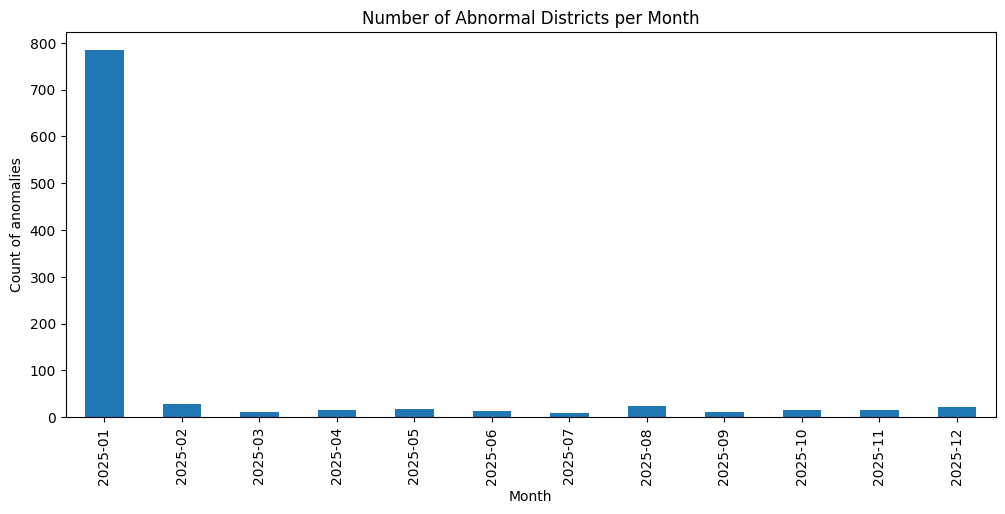

In [29]:
anomaly_counts = anomalies_df.groupby('month').size()

anomaly_counts

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
anomaly_counts.plot(kind='bar')
plt.title("Number of Abnormal Districts per Month")
plt.xlabel("Month")
plt.ylabel("Count of anomalies")
plt.show()


In [30]:
risk_df = (
    anomalies_df
    .groupby(['state','district'])
    .agg(
        anomaly_count = ('bio_demo_ratio','count'),
        avg_severity = ('bio_demo_ratio','mean'),
        max_severity = ('bio_demo_ratio','max')
    )
    .reset_index()
)

risk_df['risk_score'] = risk_df['anomaly_count'] * risk_df['avg_severity']

risk_df.sample(15)


,state,district,anomaly_count,avg_severity,max_severity,risk_score
469,Mizoram,Lunglei,1,3.029587,3.029587,3.029587
593,Rajasthan,Jalor,1,1.314417,1.314417,1.314417
645,Telangana,Bhadradri Kothagudem,1,1.009046,1.009046,1.009046
726,Uttar Pradesh,Mahoba,1,3.238851,3.238851,3.238851
250,Jammu and Kashmir,Baramula,1,1.952837,1.952837,1.952837
439,Maharashtra,Nandurbar *,2,12.157143,12.714286,24.314286
274,Jharkhand,Garhwa *,1,24.820690,24.820690,24.820690
502,Odisha,Ganjam,1,3.104399,3.104399,3.104399
761,Uttarakhand,Rudraprayag,1,3.725331,3.725331,3.725331
118,Bihar,Siwan,1,2.462869,2.462869,2.462869


In [31]:
risk_df.head(10)

,state,district,anomaly_count,avg_severity,max_severity,risk_score
0,Andaman & Nicobar Islands,Andamans,1,29.970588,29.970588,29.970588
1,Andaman and Nicobar Islands,North And Middle Andaman,1,4.529284,4.529284,4.529284
2,Andaman and Nicobar Islands,South Andaman,1,9.930599,9.930599,9.930599
3,Andhra Pradesh,Adilabad,1,4.468227,4.468227,4.468227
4,Andhra Pradesh,Alluri Sitharama Raju,1,2.047366,2.047366,2.047366
5,Andhra Pradesh,Anantapur,1,2.324275,2.324275,2.324275
6,Andhra Pradesh,Ananthapur,1,5.860370,5.860370,5.860370
7,Andhra Pradesh,Ananthapuramu,1,2.579571,2.579571,2.579571
8,Andhra Pradesh,Annamayya,1,0.286747,0.286747,0.286747
9,Andhra Pradesh,Chittoor,1,1.870801,1.870801,1.870801


In [32]:
monthly_df.to_csv("../outputs/monthly_behavior.csv", index=False)
anomalies_df.to_csv("../outputs/anomalies.csv", index=False)
risk_df.to_csv("../outputs/district_risk.csv", index=False)


In [37]:
import os
os.listdir("../outputs")


['anomalies.csv',
 'district_risk.csv',
 'monthly_behavior.csv',
 'state_risk.csv',
 'world.geojson']

In [38]:
os.path.exists("../outputs/world.geojson")


True